Nama Anggota Kelompok :
1. Anung Binartanto (23.11.5520)
2. Arya Kusuma Wijaya (23.11.5554)
3. Cleova Calista Azizah K (23.11.5532)
4. Eria Syalwa (23.11.5535)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving dataset_handphone_cleaned.csv to dataset_handphone_cleaned (2).csv


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("dataset_handphone_cleaned.csv")
df.head()

,Id_hp,Nama_hp,Brand,Harga,Ram,Memori_internal,Ukuran_layar,Resolusi_kamera,Kapasitas_baterai,Os,Rating_pengguna,Tahun_rilis,Stok_tersedia
0,1,Apple Max 10,Apple,15015201,12,256,5.5,48,4000,iOS,2.4,1905,True
1,2,Apple Max 11,Apple,18727456,4,512,6.1,108,5000,iOS,4.4,2020,False
2,3,Apple Max 14,Apple,6526745,16,128,6.8,108,4000,iOS,4.1,2024,True
3,4,Apple Max 16,Apple,13673821,16,256,6.1,12,4000,iOS,4.6,2024,True
4,5,Apple Max 16,Apple,14212345,4,256,6.5,12,4500,iOS,4.4,2019,True


In [23]:
df.info()
df.describe()
df.isnull().sum()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id_hp              1000 non-null   int64  
 1   Nama_hp            1000 non-null   object 
 2   Brand              1000 non-null   object 
 3   Harga              1000 non-null   int64  
 4   Ram                1000 non-null   int64  
 5   Memori_internal    1000 non-null   int64  
 6   Ukuran_layar       1000 non-null   float64
 7   Resolusi_kamera    1000 non-null   int64  
 8   Kapasitas_baterai  1000 non-null   int64  
 9   Os                 1000 non-null   object 
 10  Rating_pengguna    1000 non-null   float64
 11  Tahun_rilis        1000 non-null   int64  
 12  Stok_tersedia      1000 non-null   bool   
dtypes: bool(1), float64(2), int64(7), object(3)
memory usage: 94.9+ KB


(1000, 13)

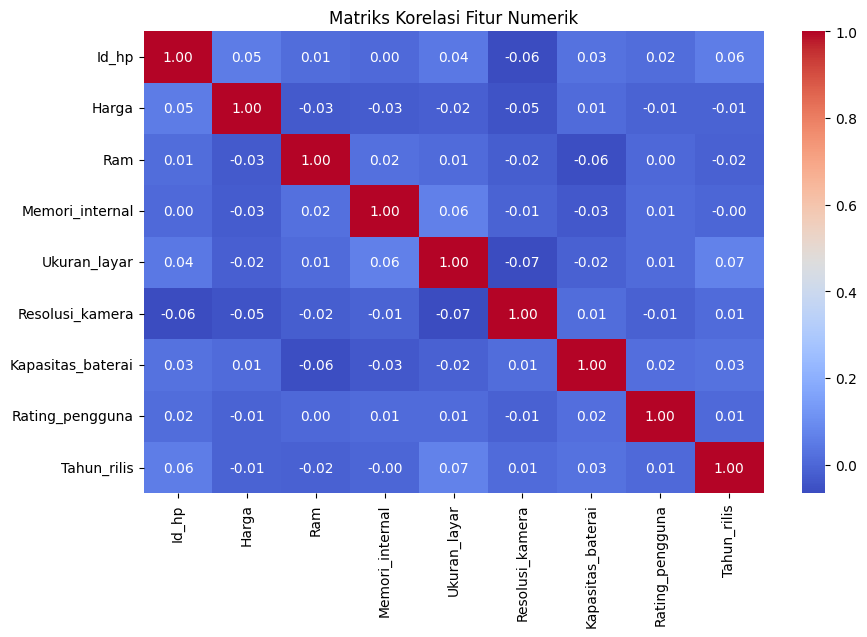

In [25]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Fitur Numerik")
plt.show()

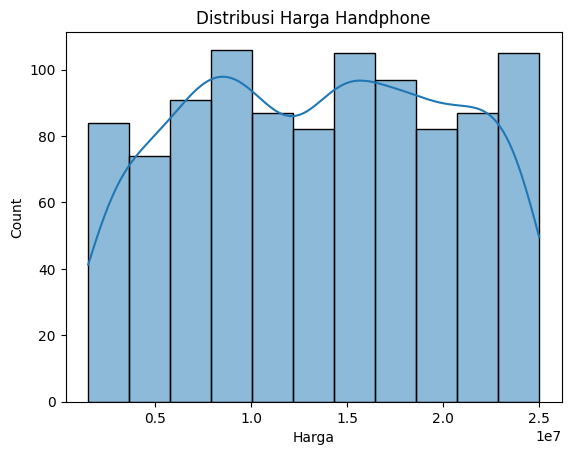

In [26]:
sns.histplot(df['Harga'], kde=True)
plt.title("Distribusi Harga Handphone")
plt.xlabel("Harga")
plt.show()

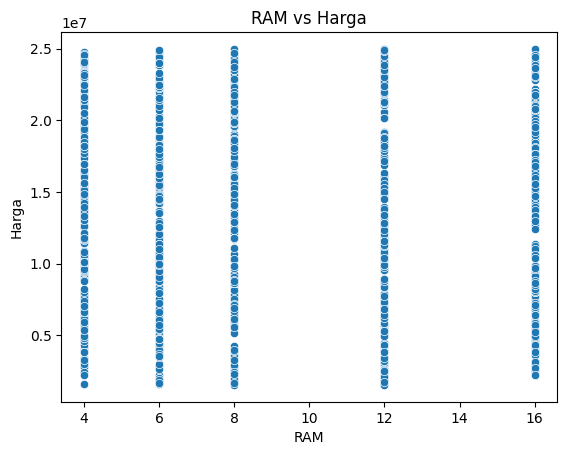

In [27]:
sns.scatterplot(x='Ram', y='Harga', data=df)
plt.title("RAM vs Harga")
plt.xlabel("RAM")
plt.ylabel("Harga")
plt.show()

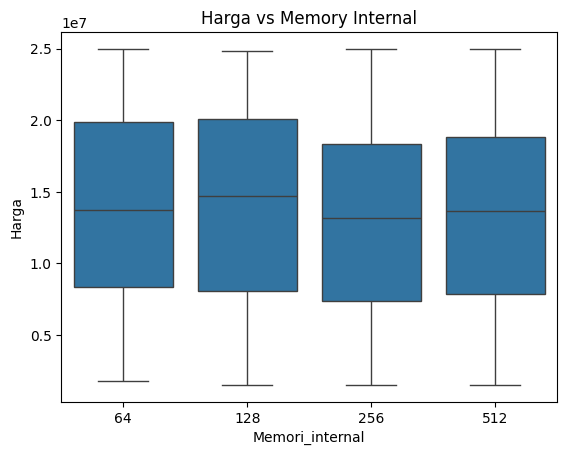

In [29]:
sns.boxplot(x='Memori_internal', y='Harga', data=df)
plt.title("Harga vs Memory Internal")
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

X = df[['Ram', 'Memori_internal']]  # Anda bisa tambahkan fitur lain
y = df['Harga']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error (MSE): 43670145939029.92
R2 Score: 0.003044664680738274


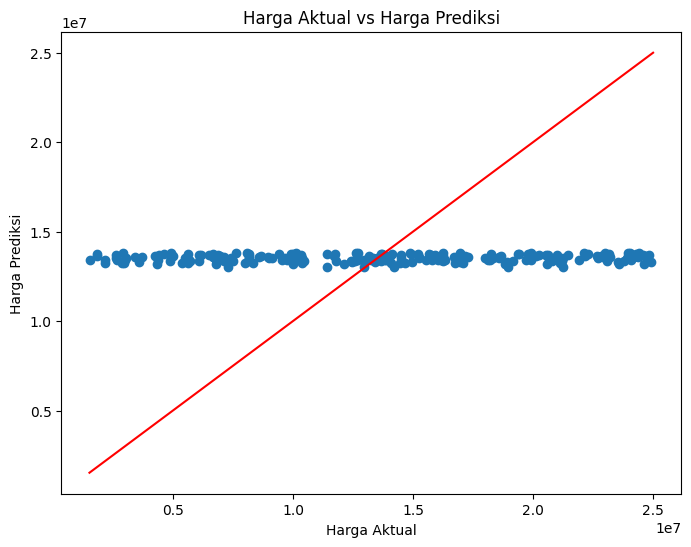

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Harga Aktual")
plt.ylabel("Harga Prediksi")
plt.title("Harga Aktual vs Harga Prediksi")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.show()

In [37]:
df.to_csv("dataset_final.csv", index=False)
files.download("dataset_final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
print("Intercept:", model.intercept_)
print("Koefisien:", model.coef_)

# Menampilkan dalam format tabel
pd.DataFrame({'Fitur': X.columns, 'Koefisien': model.coef_})

Intercept: 14019362.05553255
Koefisien: [-34073.98755614   -884.78507994]


,Fitur,Koefisien
0,Ram,-34073.987556
1,Memori_internal,-884.785080


In [39]:
print("Model regresi linier yang dibuat memprediksi harga berdasarkan fitur RAM dan memory internal.")
print("Semakin besar RAM, biasanya harga juga naik — jika koefisien RAM positif.")
print("R² score mendekati 1 menandakan model cukup akurat.")


Model regresi linier yang dibuat memprediksi harga berdasarkan fitur RAM dan memory internal.
Semakin besar RAM, biasanya harga juga naik — jika koefisien RAM positif.
R² score mendekati 1 menandakan model cukup akurat.


In [40]:
pd.DataFrame({'Aktual': y_test.values, 'Prediksi': y_pred})

,Aktual,Prediksi
0,7113005,1.336093e+07
1,11718028,1.363352e+07
2,15247695,1.352027e+07
3,20130131,1.365656e+07
4,8152872,1.352027e+07
...,...,...
195,23953047,1.382644e+07
196,10388227,1.338397e+07
197,14913761,1.376981e+07
198,11743988,1.376981e+07


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)